In [10]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="1250",
    database="olist"
)

In [12]:
plt.style.use("seaborn-v0_8-pastel")

### Q3. 월별 매출 추이

SQL문

In [17]:
q3_sql = """
    SELECT
    	DATE_FORMAT(orders.order_purchase_timestamp, '%Y-%m') AS month,
    	SUM(order_payments.payment_value) AS monthly_sales
    FROM
    	order_payments
    INNER JOIN
    	orders
    ON
    	order_payments.order_id = orders.order_id
    GROUP BY
    	month
    ORDER BY
    	month;
"""

데이터 분석

In [18]:
q3_df = pd.read_sql(q3_sql, conn)
q3_df = q3_df.set_index("month")

C:\Users\minni\AppData\Local\Temp\ipykernel_106300\3510101483.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  q3_df = pd.read_sql(q3_sql, conn)


In [19]:
q3_df

,monthly_sales
month,
2016-09,2.522400e+02
2016-10,5.909048e+04
2016-12,1.962000e+01
2017-01,1.384880e+05
2017-02,2.919080e+05
2017-03,4.498636e+05
2017-04,4.177880e+05
2017-05,5.929188e+05
2017-06,5.112764e+05


데이터 시각화

C:\Users\minni\AppData\Local\Temp\ipykernel_106300\2972843036.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


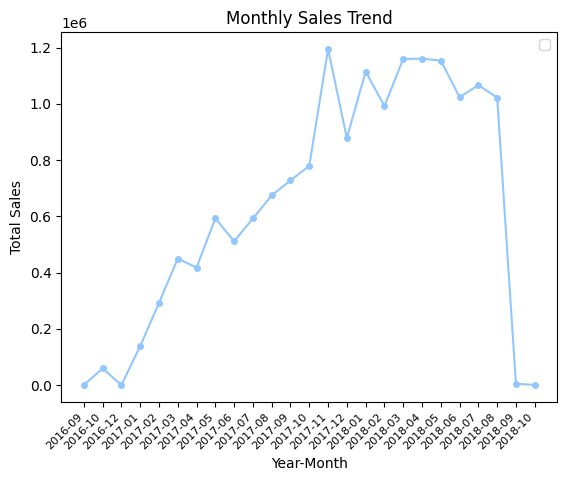

In [20]:
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.plot(q3_df, marker="o", markersize=4)
plt.xticks(size=8, rotation=45, ha="right")
plt.legend()